In [67]:
#importing neccesaary libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [68]:
#Loading both the dataset
df1=pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/dataset/historical_data.csv")
df2=pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/dataset/fear_greed_index.csv")

In [69]:
df1['Timestamp IST'] = pd.to_datetime(df1['Timestamp IST'], format='%d-%m-%Y %H:%M')

df1['date'] = df1['Timestamp IST'].dt.date

df2['date'] = pd.to_datetime(df2['date']).dt.date

In [70]:
#df1.head()

In [71]:
# Merging on the date column
df = pd.merge(df1, df2[['date', 'classification']], on='date', how='left')
#df.head()

In [72]:
#checking whether the data consist of null values or not
df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [73]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
211219,False
211220,False
211221,False
211222,False


In [74]:
df.shape

(211224, 18)

In [75]:
# dropping irrelevant column
cols_to_drop = ['Transaction Hash', 'Order ID', 'Trade ID', 'Timestamp']

df.drop(columns=cols_to_drop, inplace=True)
#df.head()

In [76]:
# to Check basic data info and unique sentiments
df.shape, df['classification'].unique()


((211224, 14),
 array(['Extreme Greed', 'Extreme Fear', 'Fear', 'Greed', 'Neutral', nan],
       dtype=object))

Correlation Between Trade Size and Profit

In [90]:
df[['Size USD', 'Closed PnL']].corr()

,Size USD,Closed PnL
Size USD,1.000000,0.123589
Closed PnL,0.123589,1.000000


In [89]:
#Number of Unique Traders (Accounts)
df['Account'].nunique()

32

In [93]:
# Top 5 most active trading days
df['date'].value_counts().head(5)

,count
date,
2025-02-25,6246
2025-04-23,6159
2025-02-24,5616
2025-03-12,3968
2025-04-09,3967


In [92]:
#Top 5 Highest Profit Trades
df.sort_values(by='Closed PnL', ascending=False).head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date,classification
18045,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,1570.1,186.5296,292870.12,BUY,2025-04-12 12:31:00,-203.3554,Close Short,135329.09010,False,29.287012,2025-04-12,Fear
17270,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2284.0,300.0000,685200.00,BUY,2025-02-28 01:02:00,-1300.0000,Close Short,115287.00000,False,68.520000,2025-02-28,Extreme Fear
18043,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,1570.1,108.4516,170279.86,BUY,2025-04-12 12:31:00,-311.8148,Close Short,78682.72032,False,17.027985,2025-04-12,Fear
210024,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3354.0,274.7973,921670.14,BUY,2025-01-08 19:42:00,-274.7973,Close Short,74530.52371,False,92.167014,2025-01-08,Greed
18024,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,1570.1,99.7612,156635.06,BUY,2025-04-12 12:22:00,-417.5139,Close Short,72377.74821,False,15.663506,2025-04-12,Fear


In [94]:
# Count of days per sentiment
df.groupby('classification')['date'].nunique()

,date
classification,
Extreme Fear,14
Extreme Greed,114
Fear,91
Greed,193
Neutral,67


In [77]:
## to Understand cost of trading on different emotional day
df.groupby('classification')['Fee'].mean()

,Fee
classification,
Extreme Fear,1.116291
Extreme Greed,0.675902
Fear,1.495172
Greed,1.254372
Neutral,1.044798


Buy vs Sell Across Sentiments

In [78]:
df.groupby('classification')['Direction'].value_counts()
#Shows whether traders mostly Buy or Sell under each market mood.

classification  Direction                
Extreme Fear    Open Long                     7005
                Close Long                    6241
                Open Short                    3174
                Close Short                   3117
                Sell                          1042
                Buy                            807
                Short > Long                     6
                Long > Short                     5
                Spot Dust Conversion             3
Extreme Greed   Open Short                    7663
                Close Long                    7186
                Sell                          7164
                Close Short                   6497
                Open Long                     6300
                Buy                           5132
                Spot Dust Conversion            32
                Short > Long                    11
                Long > Short                     7
Fear            Open Long                    17824
                Close Long                   17260
                Open Short                   10887
                Close Short                   9221
                Sell                          3364
                Buy                           3207
                Spot Dust Conversion            42
                Short > Long                    18
                Long > Short                    14
Greed           Open Short                   11664
                Close Short                  11322
                Open Long                     8544
                Close Long                    7998
                Sell                          5986
                Buy                           4685
                Spot Dust Conversion            55
                Short > Long                    23
                Long > Short                    16
                Auto-Deleveraging                8
                Liquidated Isolated Short        1
                Settlement                       1
Neutral         Open Long                    10222
                Close Long                    9993
                Open Short                    6353
                Close Short                   5850
                Buy                           2885
                Sell                          2346
                Long > Short                    15
                Short > Long                    12
                Spot Dust Conversion            10
Name: count, dtype: int64

Trading Activity Over Time

In [79]:
df['date'].value_counts().sort_index().head()
#Shows trading activity volume over time (helps spot active vs quiet days).

,count
date,
2023-05-01,3
2023-12-05,9
2023-12-14,11
2023-12-15,2
2023-12-16,3


Average Profit/Loss by Market Sentiment

In [80]:
avg_pnl = df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print(avg_pnl)
#We analyze how profitable trades are during each market sentiment.

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


Average Trade Size (USD) During Each Sentiment

In [81]:
avg_size = df.groupby('classification')['Size USD'].mean().sort_values(ascending=False)
print(avg_size)
#We check if traders tend to trade bigger amounts during Greed or Fear

classification
Fear             7816.109931
Greed            5736.884375
Extreme Fear     5349.731843
Neutral          4782.732661
Extreme Greed    3112.251565
Name: Size USD, dtype: float64


/tmp/ipython-input-82-609820072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_size.index, y=avg_size.values, palette='viridis')


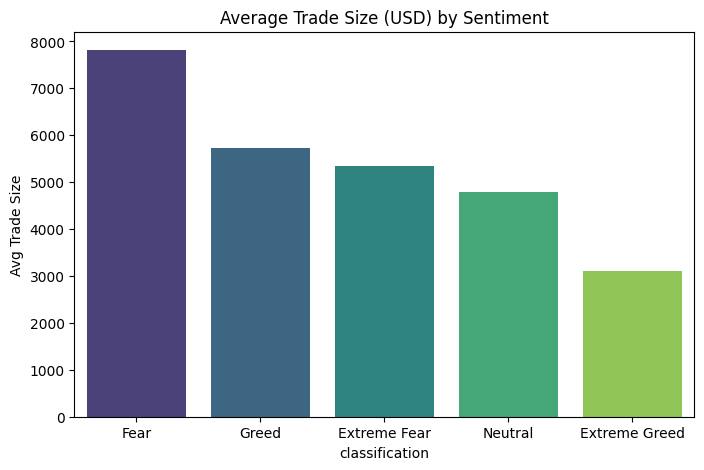

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_size.index, y=avg_size.values, palette='viridis')
plt.title("Average Trade Size (USD) by Sentiment")
plt.ylabel("Avg Trade Size")
plt.show();

Buy vs Sell Count by Sentiment

In [83]:
side_counts = df.groupby(['classification', 'Side']).size().unstack()
print(side_counts)
##We want to know if people BUY more in Greed and SELL more in Fear.

Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717


/tmp/ipython-input-84-4263937846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=df, palette='Set2')


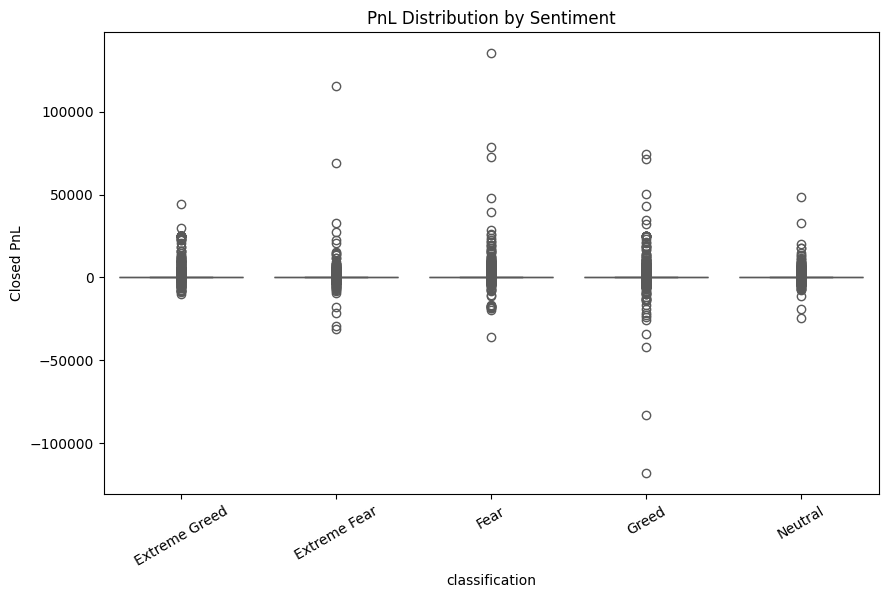

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Closed PnL', data=df, palette='Set2')
plt.title("PnL Distribution by Sentiment")
plt.xticks(rotation=30)
plt.show()## We examine the variation and outliers in profits/losses during each sentiment.

 Average Fee Paid by Sentiment

In [85]:
avg_fee = df.groupby('classification')['Fee'].mean().sort_values(ascending=False)
print(avg_fee)
##We check if traders pay more fees in greedy or fearful markets (e.g., due to urgency)
 #confirmation of whether high emotion leads to higher trading costs

classification
Fear             1.495172
Greed            1.254372
Extreme Fear     1.116291
Neutral          1.044798
Extreme Greed    0.675902
Name: Fee, dtype: float64


Daily Trading Activity

In [86]:
daily_trades = df.groupby('date').size()

daily_sentiment = df.groupby('date')['classification'].first()

trade_sentiment = pd.DataFrame({'Trade Count': daily_trades, 'Sentiment': daily_sentiment})
print(trade_sentiment)
##We uncover how trading activity changes daily and which sentiment dominates when volume spikes

            Trade Count      Sentiment
date                                  
2023-05-01            3          Greed
2023-12-05            9  Extreme Greed
2023-12-14           11          Greed
2023-12-15            2          Greed
2023-12-16            3          Greed
...                 ...            ...
2025-04-27          337          Greed
2025-04-28         1379        Neutral
2025-04-29         2243          Greed
2025-04-30         1113          Greed
2025-05-01         1230        Neutral

[480 rows x 2 columns]


 High Profit Trade Sentiment

In [87]:
high_pnl_df = df[df['Closed PnL'] > 1000]

high_pnl_counts = high_pnl_df['classification'].value_counts()
high_pnl_counts
## Counting how many high-profit trades (>1000 PnL) happen under each sentiment

,count
classification,
Fear,693
Extreme Greed,486
Greed,465
Neutral,324
Extreme Fear,187


Total Profit/Loss by Sentiment

/tmp/ipython-input-88-1538606460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pnl.index, y=total_pnl.values, palette='coolwarm')


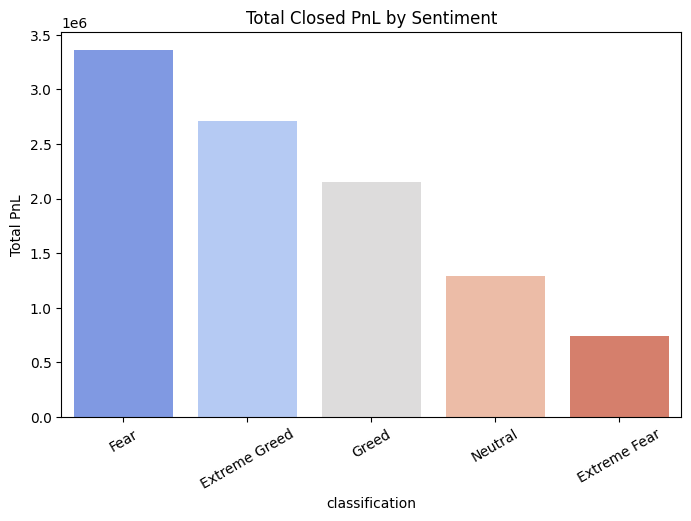

In [88]:
total_pnl = df.groupby('classification')['Closed PnL'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=total_pnl.index, y=total_pnl.values, palette='coolwarm')
plt.title("Total Closed PnL by Sentiment")
plt.ylabel("Total PnL")
plt.xticks(rotation=30)
plt.show()
 # Total PnL across all trades to find the most profitable sentiment type overall


In this project, I explored how trader behavior changes depending on the market mood (Fear or Greed), using two datasets — 1)trade activity
2)fear greed index
I found that:

Traders tend to buy more during "greed" and sell more during "fear" phases.

Profits (PnL) are usually higher in greed phases, but there’s also more risk.

Trade sizes are bigger when the market is in greed — meaning people take bolder actions.

Fees paid are also slightly higher during greed — maybe due to more activity or faster decisions.

On days with high activity, greed is usually the dominating sentiment.

I also checked high-profit trades, and most of them happened during greed phases

